In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../src")
from eda import EDA
from forecast import Forecast

### Fetch data

In [2]:
eda = EDA()

In [3]:
data = eda.fetch_data(["TSLA"], "2015-01-01", "2026-01-15")

[*********************100%***********************]  1 of 1 completed


In [4]:
tsla = data["TSLA"][["Adj Close"]].copy()
tsla.index = pd.to_datetime(tsla.index)
tsla = tsla.asfreq("B").ffill()

### Train/test split

In [5]:
forecast = Forecast()

In [6]:
train, test = forecast.prepare_data(tsla, column="Adj Close", train_end="2024-12-31")

In [7]:
print(train.shape)
print(train.head())
print(train.isna().sum())


(2608, 1)
Price       Adj Close
Date                 
2015-01-02  14.620667
2015-01-05  14.006000
2015-01-06  14.085333
2015-01-07  14.063333
2015-01-08  14.041333
Price
Adj Close    0
dtype: int64


In [8]:
print(test.head())


Price        Adj Close
Date                  
2025-01-01  403.839996
2025-01-02  379.279999
2025-01-03  410.440002
2025-01-06  411.049988
2025-01-07  394.359985


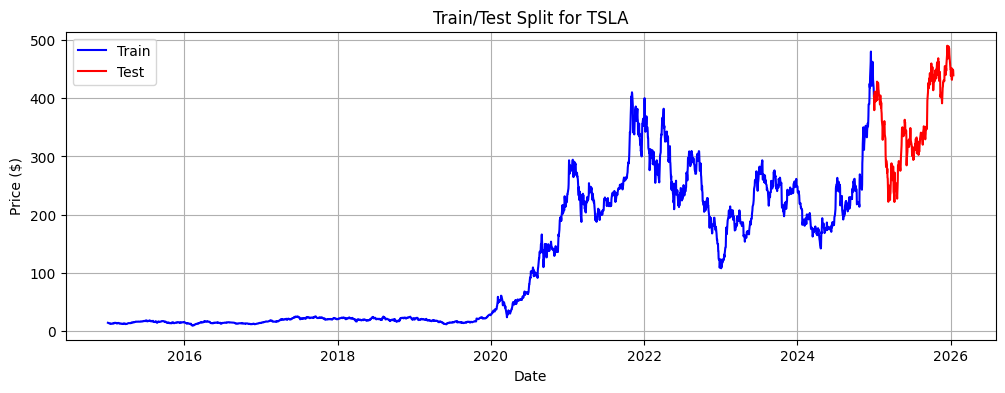

In [9]:
plt.figure(figsize=(12,4))
plt.plot(train['Adj Close'], label='Train', color='blue')
plt.plot(test['Adj Close'], label='Test', color='red')
plt.title("Train/Test Split for TSLA")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


### ARIMA Forecast

In [10]:
arima_model, arima_forecast = forecast.arima_forecast(train, test)

In [11]:
print(arima_forecast.head())
print(arima_forecast.isna().sum())

              Forecast
Date                  
2025-01-01  405.759729
2025-01-02  405.251548
2025-01-03  404.840126
2025-01-06  405.762175
2025-01-07  404.869399
Forecast    0
dtype: int64


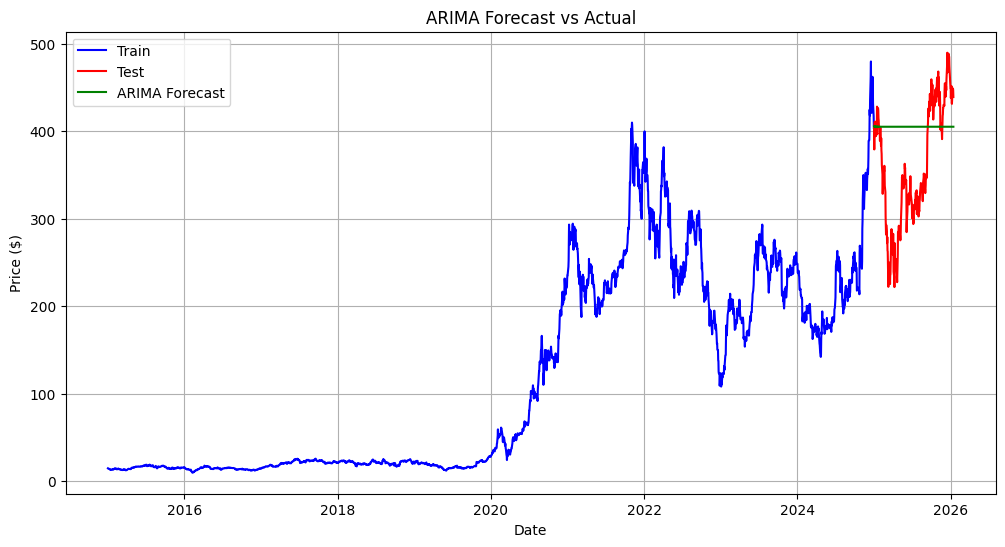

In [12]:
plt.figure(figsize=(12,6))
plt.plot(train['Adj Close'], label='Train', color='blue')
plt.plot(test['Adj Close'], label='Test', color='red')
plt.plot(arima_forecast['Forecast'], label='ARIMA Forecast', color='green')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


### LSTM Forecast

In [13]:
lstm_forecast = forecast.lstm_forecast(train, test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


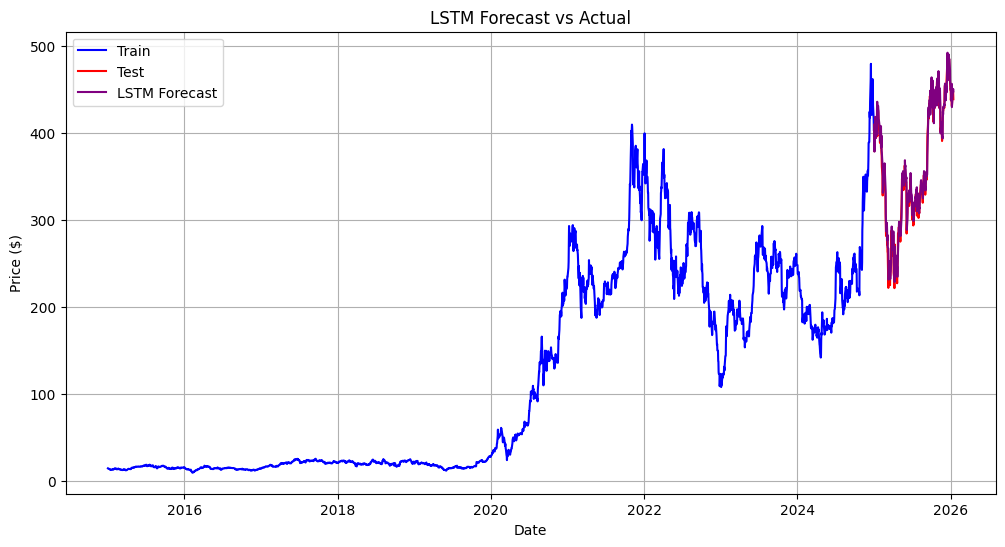

In [14]:
plt.figure(figsize=(12,6))
plt.plot(train['Adj Close'], label='Train', color='blue')
plt.plot(test['Adj Close'], label='Test', color='red')
plt.plot(lstm_forecast['Forecast'], label='LSTM Forecast', color='purple')
plt.title("LSTM Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


### Evaluate

In [15]:
metrics_df = forecast.evaluate_models(test, arima_forecast, lstm_forecast)
metrics_df["Model"] = ["ARIMA", "LSTM"]
print(metrics_df)

   Model        MAE       RMSE       MAPE
0  ARIMA  69.433439  83.223656  22.535688
1   LSTM  10.458652  13.522853   3.065842


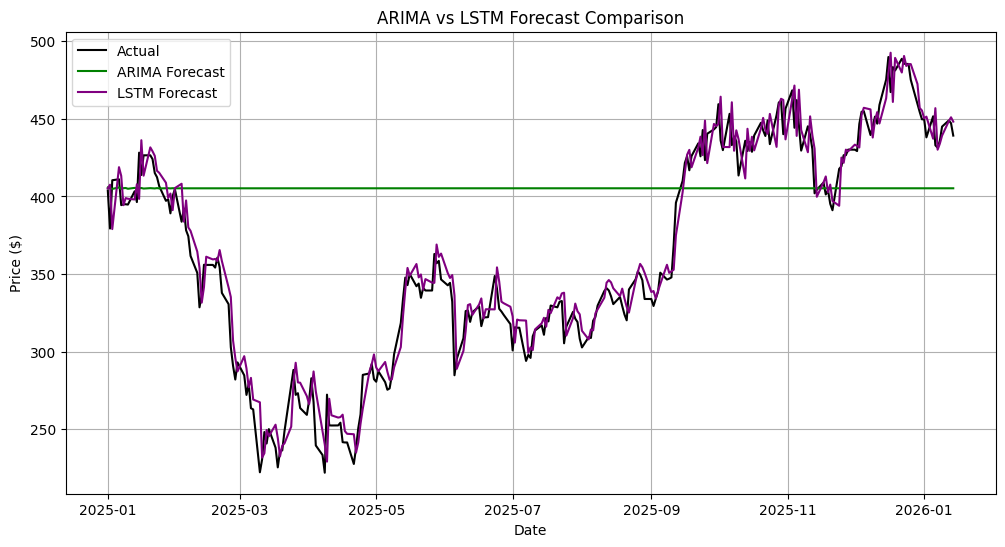

In [16]:
plt.figure(figsize=(12,6))
plt.plot(test['Adj Close'], label='Actual', color='black')
plt.plot(arima_forecast['Forecast'], label='ARIMA Forecast', color='green')
plt.plot(lstm_forecast['Forecast'], label='LSTM Forecast', color='purple')
plt.title("ARIMA vs LSTM Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


### Forecast Errors

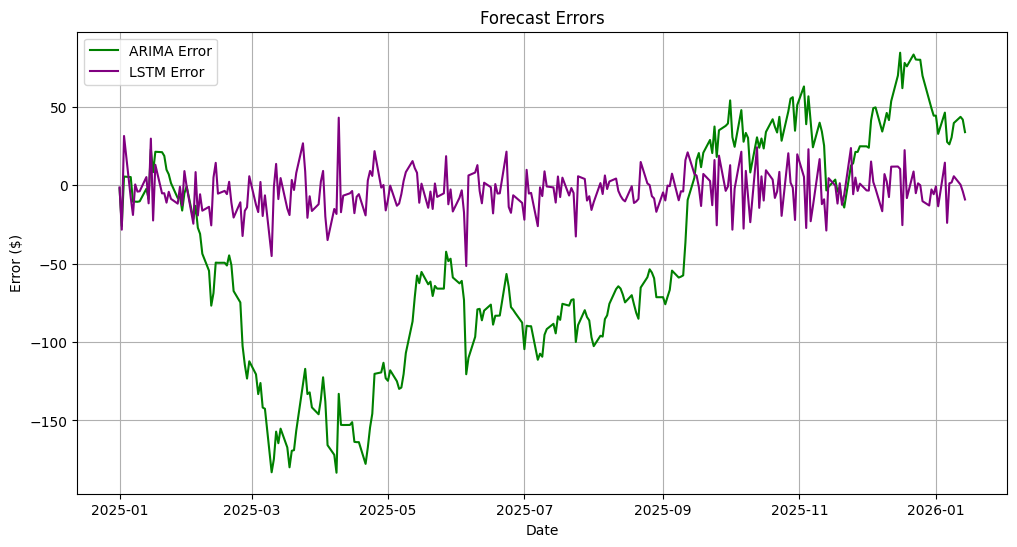

In [17]:
arima_error = test['Adj Close'] - arima_forecast['Forecast']
lstm_error  = test['Adj Close'] - lstm_forecast['Forecast']

plt.figure(figsize=(12,6))
plt.plot(arima_error, label='ARIMA Error', color='green')
plt.plot(lstm_error, label='LSTM Error', color='purple')
plt.title("Forecast Errors")
plt.xlabel("Date")
plt.ylabel("Error ($)")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
tsla.to_csv("../data/processed/tsla_clean.csv")